# Big Brother's Cameras are here to stay 



The use of surveillance cameras by private businesses, as well as municipal governments is predicted to increase.  Recent police shootings of unarmed men have caused many municipalities to call for the use of body cameras to be mounted on police officers as they engage on their duties.  Harvard University recently came under fire for having conducted class-attendance research that involved the use of video cameras in lecture halls without student's knowledge or consent. Video surveillance “smart” cameras in operation in New York City have the ability to single out individuals based on colors they are wearing, let police know when a backpack was left behind by an individual, read thousands of license plates each second and check the scanned numbers against a database that saves the location where that vehicle has been scanned before. All of these cameras need to be programmed, manned, and any data collected by them needs to be stored for possible later retrieval that can be used in court cases, police investigations, and much more.  Database software will be needed to code the applications that deal with the storage of this data.  Real-time computer vision software will be needed in order to do the tracking, face recognition, object character recognition, recording, and so on. All of these requirements will continue to demand fast and efficient computer vision applications  to deal with these situations. 

The use of an interpreted language like python, with a reputation of being a lot slower than C/C++, brings a new set of challenges to cope with in order to produce fast executed code.  For this reason the question of how C/C++ code is called from python, is essential in the production of real-time computer vision applications. We will explore ways and techniques that have been used to accomplish this non-trivial endeavor, in addition to new approaches recently introduced that guarantee that the OpenCV - Python bindings take advantage of the latest optimization techniques. The OpenCV library is a good choice to meet many of these demands, and we will now explore it in great detail. 
OpenCV - Python is a library of Python bindings that allows us to execute computationally optimized code written in low-level languages, and called from easily readable python code thus increasing programming productivity and efficiency. This efficiency is achieved by writing portions of the code that are not detrimental to performance, in a high-level language, in our case the Python language. By doing this the developer is able to relegate the performance critical code portions of the program to a lower-level language, like Fortran, or C/C++. We will take a closer look at the relationship of the OpenCV Python bindings, wrappers, and how they work vis-a-vis the OpenCV API C/C++ interface in order to make this interoperability possible.  The Python bindings of OpenCV have changed over the years, and we will explore what kind of requirements made these changes necessary, and the additions that took their place.
In this chapter we will explore how OpenCV code originally written in low-level C/C++ can be called from higher-level python scripts and programs. We will: explore different             techniques by dealing with real examples that use these approaches.  In this chapter we
will: 					            
Learn how to use Swig to generate wrapper code
Learn how to bind and wrap C/C++ code and call it from a Python program     
Learn to use the Python C/API with OpenCV

Learn about other interface libraries that work well with OpenCV
Learn how to write and incorporate an Android application with the OpenCV libraries written in C/C++ and its python bindings 
In the next section we will cover some  concepts regarding the Python programming language and its bindings and how they interact with the main C and C++ code of the OpenCV library.
Introduction to the OpenCV - Python Bindings and Wrappers

The Python C/API is the cornerstone of the standard Python interpreter. By using this API it is possible to write Python extension modules written in C and C++, making it possible from these modules to call functions written in C or C++. In order to take advantage of the Python C/API, one has to follow its code guidelines and requirements, as well as parsing function procedures in order to produce the desired return type. This can be done manually, or you can take advantage of code generators and interface libraries. There are many choices and alternatives, too many to list, and I will only deal with the ones that have been used by OpenCV as part of its implementation.  
A simple example of SWIG in action 

In order to understand a little bit more about the OpenCV - Python bindings, it would be helpful, if not just for historical reasons, to see how OpenCV operated just a couple of versions ago.  I believe will help to give us an overall picture, and we can start to appreciate some of the changes that were made to it, and most importantly how they came about.  For this reason we will briefly take a look at the SWIG code generator. 
Some of these changes can easily be noticed if you happen to download an older version of OpenCV legacy code.  
When looking through the OpenCV version 1.0,  you will notice that inside of the main directory, there is a main directory with all the directories and files that you will need for building and compilation 

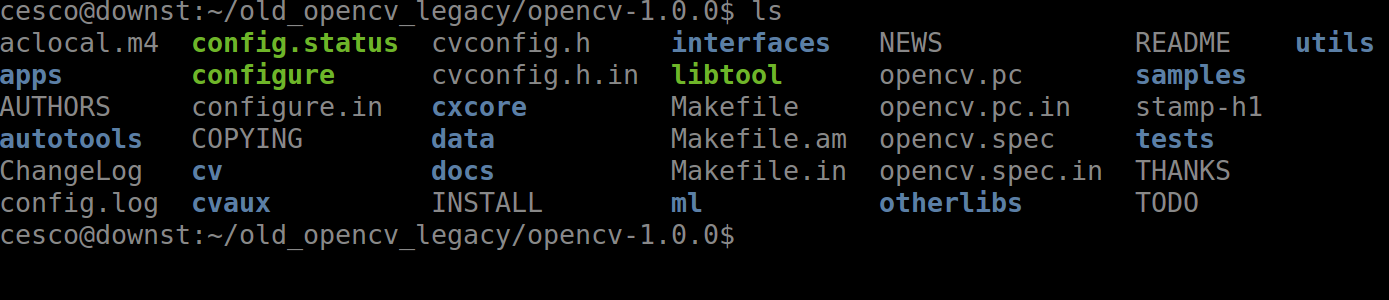

In [122]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_01.png') 

there is an interfaces directory with a directory named SWIG inside of it.

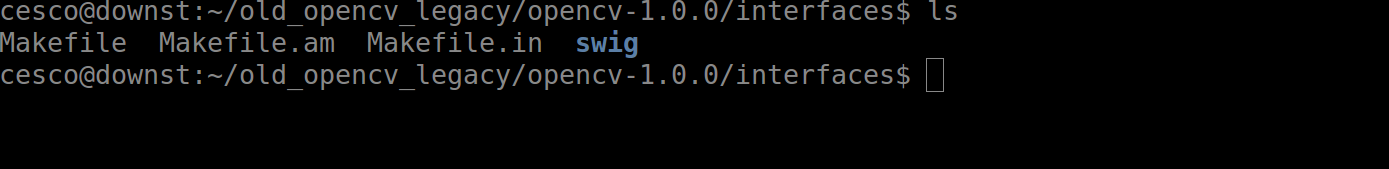

In [123]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_02.png') 

Inside the SWIG directory you can find all the interfaces needed to serve as a bridge between low-level languages and Python.

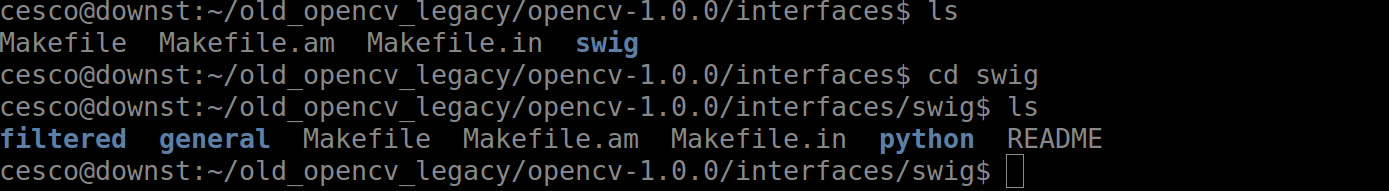

In [124]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_03.png') 

You also find the general directory where more situation-specific interfaces and header files are located.


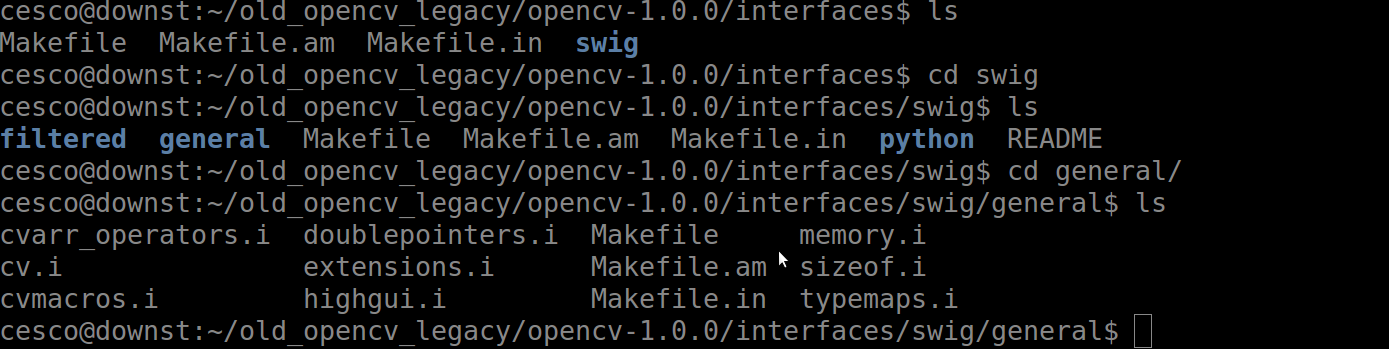

In [125]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_04.png') 

Inside of the Python directory you notice that it includes all the header files that are needed for the generation of code that make the calls to low-level functions.  

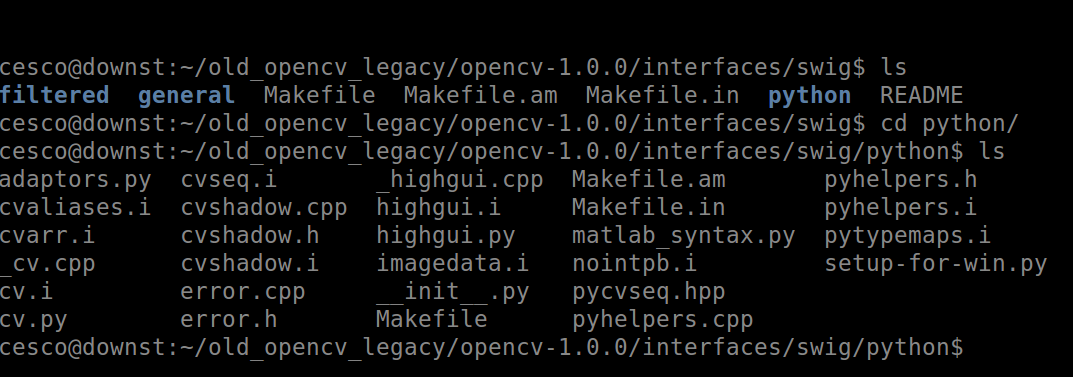

In [126]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_05.png') 

Swig is a very powerful command-line tool and popular interface compiler that serves as a bridge between programs written in C/C++ and Python.  SWIG is also very popular as glue code for many other scripting languages.  It works by taking the declarations in .h header files and using them to generate wrapper code, code from where scripting languages can then access the underlying C / C++ code. SWIG is able to parse these declarations and creates an output file of C/C++ containing code. This produced code can then be compiled in a shared library to make your Python module that you can subsequently import from a Python interpreter. This was the way that earlier versions of OpenCV-Python first wrapped C/C++ code. OpenCV used SWIG as a code generator in order for Python to call low-level C and C++ code.  By generating code in this fashion, the OpenCV low-level C/C++ code was cleanly separated from its more “programmable” scripting interface written in Python.  
SWIG depends on the following components:

Preprocessor
Parser 
Features
Typemaps

For more information on the internals of swig, and more 	advanced uses 	visit their website:
		www.swig.org
        
In this next example we introduce a very simple hello_world program written in C++ that will illustrate and teach you how to use SWIG to generate Python code from where we can call the C/C++ underlying code.  This is a very simple example that emphasizes on breadth and not depth, taking into consideration the vast number of applications that can be performed using SWIG.  My intent is to simply expose you to this code generator, using a very simple technique, that can become very handy in building applications. 

If we use our favorite text editor we can imagine that our function lives in the file hello.cpp,         

//hello.cpp
#include <iostream> 
#include "hello.h" 
void sayHello() 
{ 
    std::cout << "Hello OpenCV!\n"; 
}


and the header file in the hello.h:

//hello.h
#ifndef HELLO 
#define HELLO 

    void sayHello(); 
 #endif    

and we are going to use the file main.cpp to call the function.

//main.cpp
#include "hello.h" 

int main() 
{ 
    sayHello(); 
    return 0; 
}

To summarize, we can see that in the code written in these programs, we are creating a very traditional 'hello world' program written in C++.   We are also including a header file, hello.h that contains the function to be called, and a main file, main.cpp from where we are going to call the function. 

We introduce three very important programs:

 setup.py script
 makefile script
 swigversion.i 

     
The setup.py program written in Python, allows us to take advantage of the disutils application that to build our extensions, modules, and build directories.  We also get to name our module, and the name of the source file that we will use to build our application.  

The swigversion.i program is the program that SWIG uses to produce the wrap code that serves as the interface to the C++ written code. In it we can include the module name and the libraries, header files, and any other necessary files that are needed for our application to run.  We also list everything else we want included in the extension module to be built.

//swigversion.i
%module swigversion 
%{ 
#include <stdlib.h> 
#include "hello.h" 
%} 
%include "hello.h"

The code in the Makefile file allows SWIG to seamlessly start linking our libraries, and most importantly deal with compatibility flags, and compiler issues.

//setup.py
from distutils.core import setup, Extension 

extension_mod = Extension("_swigversion", 
			["_swigversion_module.cpp", "hello.cpp"]) 
setup(name = "swigversion", ext_modules=[extension_mod])

//setup.py
from distutils.core import setup, Extension 

extension_mod = Extension("_swigversion", 
			["_swigversion_module.cpp", "hello.cpp"]) 
setup(name = "swigversion", ext_modules=[extension_mod])
python setup.py build_ext --inplace

So far we have constructed a micro environment with toy examples that mimic the tree structure of the OpenCV v. 1.0  that we went over in the last section. As you can see it contains a .cpp file, .h file, .i interface file, setup.py, Makefile, and Main file to carry the execution code to test our application.  We are now ready for building and compiling our application.
In order to run these set of programs, all you need to do is open a terminal in the same directory where these programs are located, and type  make.  

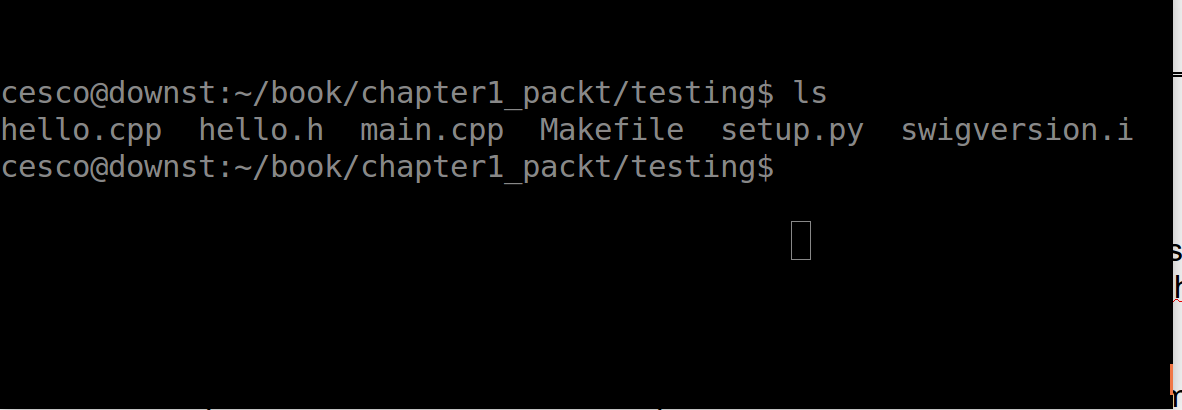

In [127]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_06.png') 

shell$ make

By entering make into your terminal, you are calling the Makefile script 	to build and link the files in that directory. There is a lot going on under 	the hood, that SWIG keeps from the programmer. If you want to know 	some of these hidden details during the code generation process,  just 	enter the following command in a terminal: 

shell$ swig -E -pyhton -c++ hello.i

and you will see that a build directory has been created in addition to some files.  The build directory was made in accordance to our specifications given in the setup.py file with the following line :

python setup.py build_ext –inplace

nside the build directory we find a couple of object files the hello.o, and the   _swigversion_module.o , and outside of the build directory, the files  swigversion.pyc,  _swigversion_module.cpp,  _swigversion.so, and the swigversion.py. The generated .pyc swigversion.pyc file contains the compiled bytecode of the Python source files, as  you can see here:

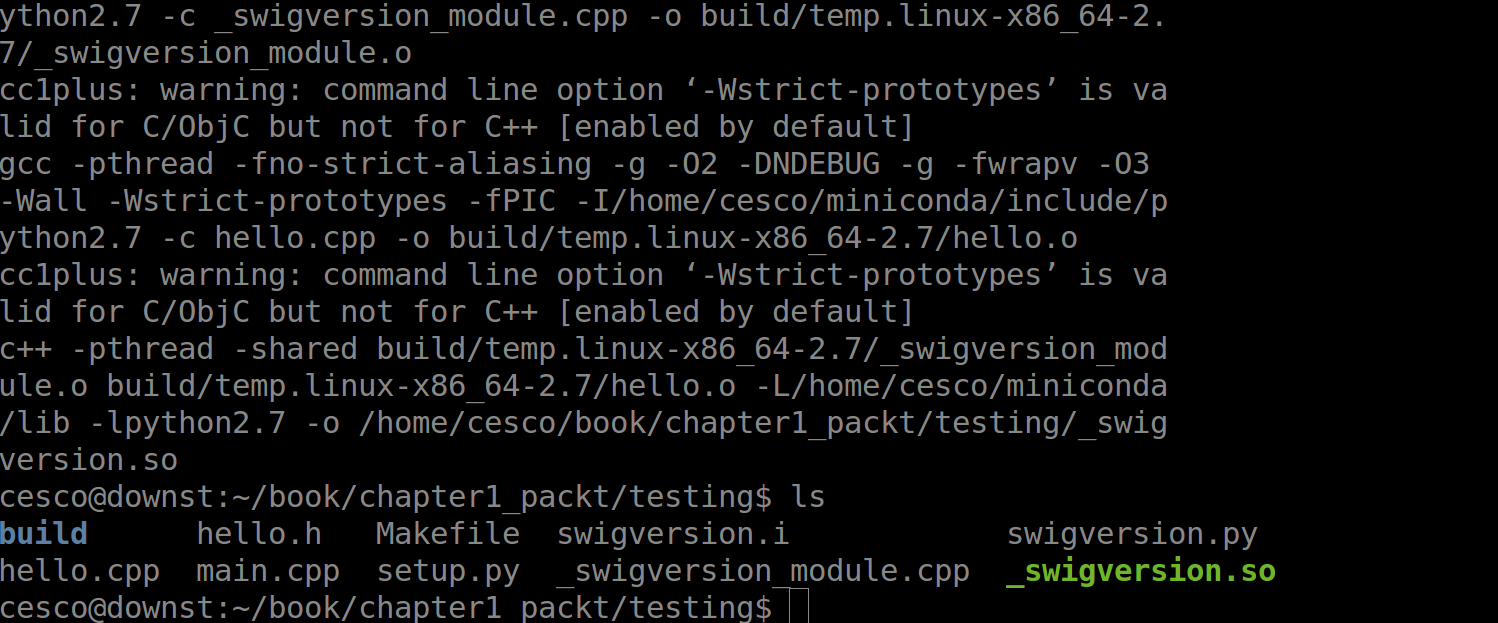

In [128]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_07.png') 

The generated C++ source file contains the low-level wrappers that need to be compiled and linked with the rest of your C/C++ application to create an extension module. The Python swigversion.py source file contains high-level support code. This is the file that you will import to use the module. And finally the _swigversion.so is the generated shared object file.
Now we are ready to call our C/C++ from the generated Python module using a command-line command from inside the Python interpreter.  All we need to do is open an interpreter from our terminal by typing the following:


shell$ python
>>>import swigversion

and you will get the following expected output:

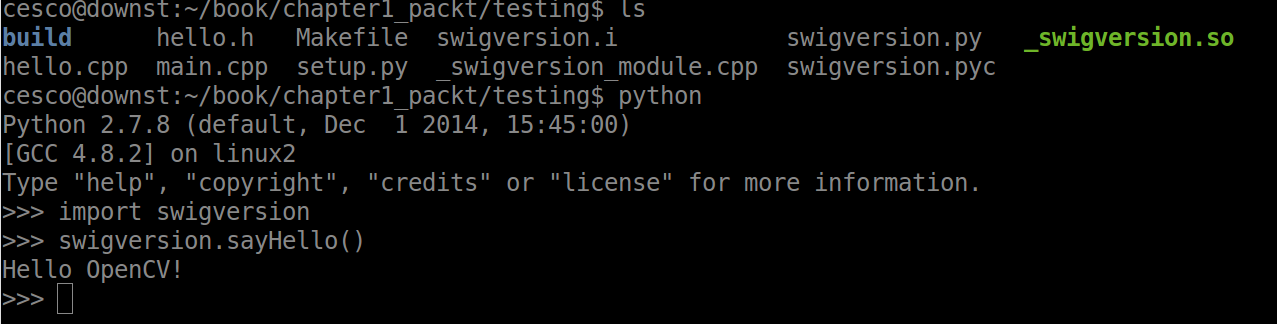

In [129]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_08.png')

And by using this technique you can call code originally written in C/C++ and be able to call it using Python.  

As we can see through the use of our toy example,  Swig has its place as a code generator for many coding situations, but it also has its disadvantages. It is very good working with C code, but as the OpenCV library was ported from C code to a more modern C++ code full of modern constructs, templates, Swig's many deficiencies became apparent. It could not handle the new C++ code as well as it did with C  code. Other deficiencies included memory leaks, silent failures, and other hard to find bugs. For this and many reasons the change away from the Swig code generator has minimized bugs and has been welcomed
by many in the OpenCV community, because of its more flexible nature and its adaptation to C++.

## A look into modern OpenCV - Python

As the evolution was made from C to a more modern C++ based code, many changes were made. The Swig interfaces model was replaced with a modularity-based approach where you can import modules, and use all levels of the Python ecosystem in seamlessly fashion.  One of these is the open source extension module, NumPy.  It uses Python syntax, thus making it easy to embed code from low level languages. The module NumPy provides very fast pre-compiled functions for numerical routines, adding to Python support for large, multi-dimensional arrays and matrices. Numpy uses arrays instead of Python lists. The only caveat is that the number of elements in a NumPy array needs to be known when the array is created, and these arrays have to be of the same type. This adds great optimization to the code saving a lot of time when doing array calculations. For this reason the NumPy array is used by many other modules in the Python ecosystem.

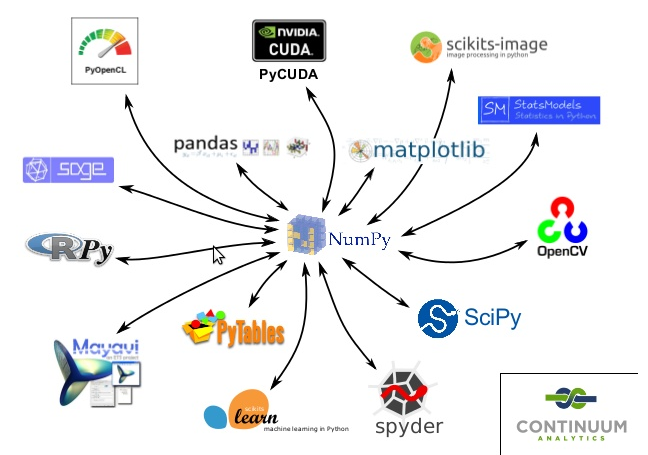

In [130]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_09.png')

In recent versions of the OpenCV - Python library, as new functions were added (usually starting with lower-case letter, but not always) the decision was made that these new functions will only support NumPy arrays. 
By taking this approach, they in fact did not expose the old main matrix class to Python, and instead opted to use the commonly used NumPy arrays as the basic standard to follow into the future.  
Two separate Python modules were made python and python2.  In the older python interface there is still full support for the old OpenCV arrays as well as the newer NumPy arrays.  On the other hand the new python2 interface only supports NumPy arrays.  
By separating Python into two different and separate modules, name conflicts tend to decrease with each subsequent version upgrade of the OpenCV library. 
There was a move to go back to the Python C API, and write code based on the same API that core Python was based on.  Python is a C library, and using it just as any other C library can help in the extending and embedding of the language. By doing this, it helped to increase performance as well as the integration of a great amount of legacy code and existing software written in low-level languages.  

## A brief introduction to the Python C API

I will introduce the Python C API by porting a similar hello.py program to the one that we used in the previous section.  

//hello.py

>>> def hello_opencv():
>>>     return “Hello OpenCV!!”

This very simple program when you run it, it will print Hello OpenCV!, whether you run it within an interpreter, or as a standalone python program.  

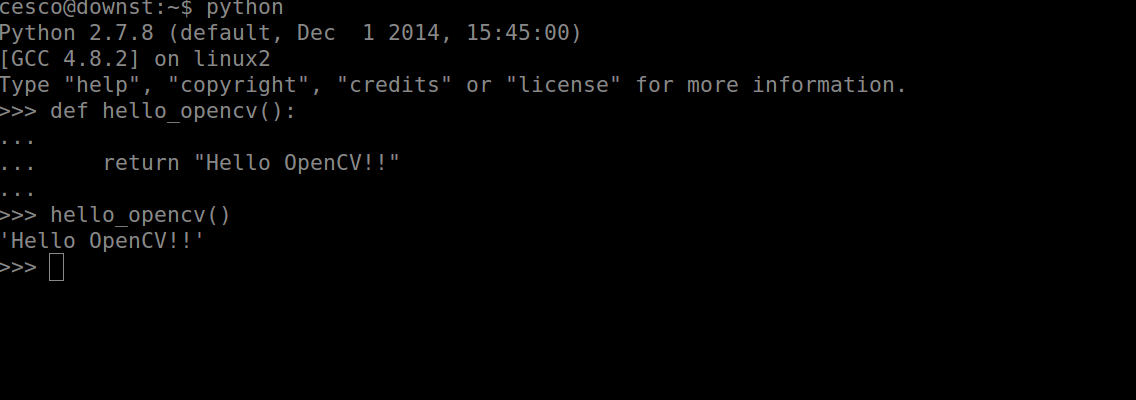

In [131]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_10.png')

Now we will write a program that will perform the same capability but using the Python C API.  

//hello_opencv.c
#include "Python.h" 

static PyObject * 

hello_opencv(PyObject *self, PyObject *args) 

{ 
   return Py_BuildValue("s", "Hello OpenCV!"); 
} 
// creation of a functions table 
static PyMethodDef 
module_functions[] = { 
    { "hello_opencv", hello_opencv, METH_VARARGS, "Say Hello" }, 
    { NULL } 
}; 
void 

inithello_opencv(void) 

{ 

    Py_InitModule3("hello_opencv", module_functions, "Hello Python C API"); 

}


The first line of code Python.h pulls the Python API, and it should always appear at the beginning before any code is added.

If you get an error saying that it can not locate this header, Python.h, you will need to install the Python-dev package. If using Debian or Ubuntu, all you need is:

sudo apt-get install python-dev]

As we keep going down the code we notice the PyObject statement.  Everything in the Python API revolves around the PyObject, because everything in Python is either an Object or a name pointing to an object.  The PyObject controls two very  important aspects, the object's reference count, and the object's type. We will return to these in due time.
Further down the code the Py_BuildValue creates a string with a return value of “Hello OpenCV!”.  The PyMethodDef is an array structure that takes four elements:
function:                                                "hello_opencv”
C implementation function:                   "hello_opencv,”
Flags on how it should be called:          METH_VARARGS 
Standard C string:                                  "Hello OpenCV!”
Sentinel:                                                 “NULL” 
Now we are ready to build this file.  So we need to create the setup.py file that takes care of the building for us. 

/setup.py
from distutils.core import setup, Extension 

setup( 
    name = "chapter1", 
    ext_modules = [ 
        Extension("hello_opencv", sources=["hello_opencv.c"]), 
        ], 
        ) 

n the setup.py we name the project, and assign the names to the extensions.  These extensions will be the modules that will be created for you to be able to call them from the Python interpreter.  The sources section lets the API know what is the source file to use for the code to be run. Now lets see what they look like:

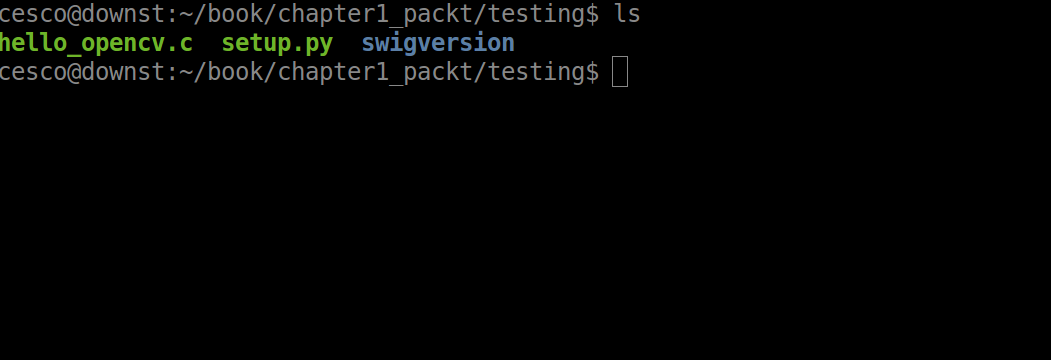

In [132]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_11.png')

Now we need to run the following command in order to build.  Using sudo if you get a permission denied error.

//hello.py

shell$ sudo python setup.py build 

or if you want the shared object file in the same directory:

shell$ sudo python setup.py build_ext --inplace

And you will get the build directory, and a couple other files,

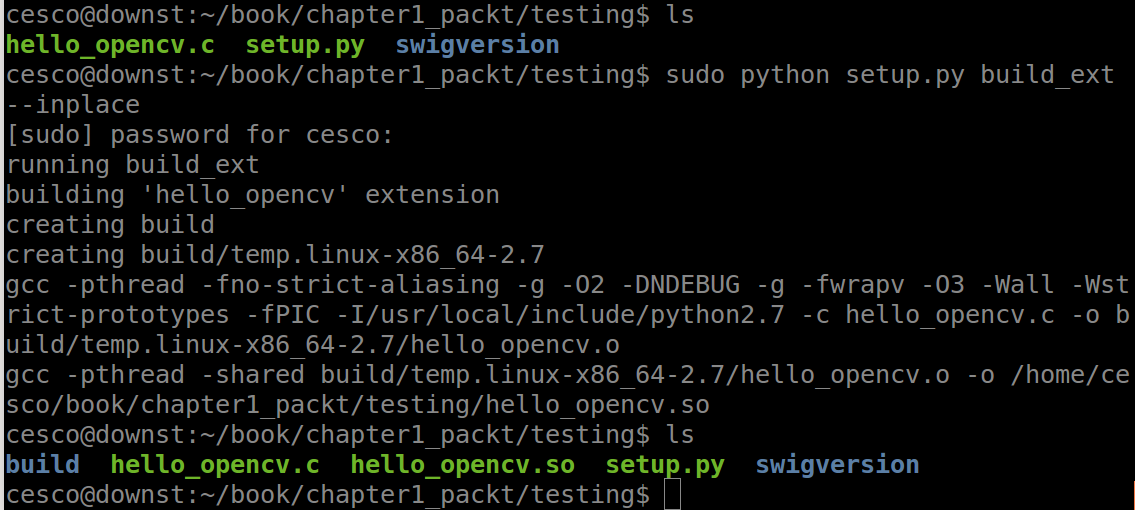

In [133]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_12.png')

As you can see two new objects have been created.  The build directory contains a temp.linux directory that in turn contains the hello_opencv.o object file that was used to create the shared object file with.  The other file is the hello_opencv.so, which is the shared object file with all of the necessary requirements that make it possible to be called from a Python interpreter.  We can now open an interpreter and call this shared object

As you can see two new objects have been created.  The build directory contains a temp.linux directory that in turn contains the hello_opencv.o object file that was used to create the shared object file with.  The other file is the hello_opencv.so, which is the shared object file with all of the necessary requirements that make it possible to be called from a Python interpreter.  We can now open an interpreter and call this shared object file, entering import hello_opencv, in order to call the function, entering hello_opencv.helllo_opencv().

shell$ python

>>> import hello_opencv

>>>

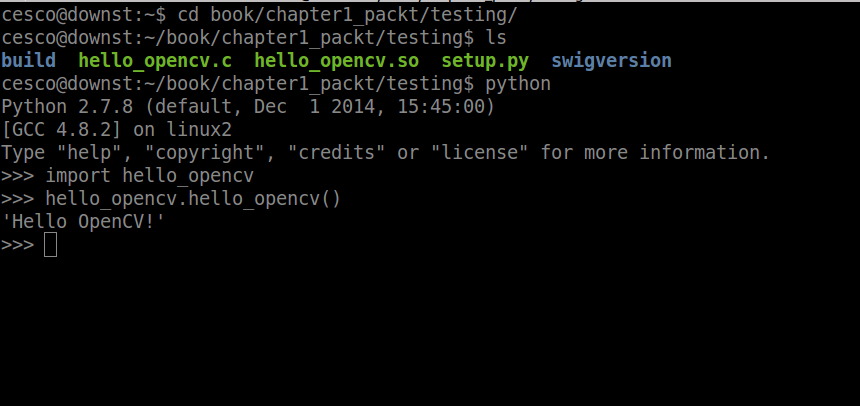

In [134]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_13.png')

We have seen how we write extensions using the Python C API, and is a very effective way of building extensions.  Some of the things that we need to pay attention to, is that we have to make sure that there is constantly checking every time a call is made.  It is important to keep checking and  converting the function return codes into exceptions, unlike regular Python, that takes care of these details for you. 
Another detail that can be dangerous is the allocation and deallocation of memory through the use of reference counts.  This is due to Python's memory management dependence on reference counts.  These reference counts need to be constantly incremented and/or decremented the required amount in order to prevent memory leaks.  
We can examine an example of reference counting in action by opening an interpreter and enter the following:

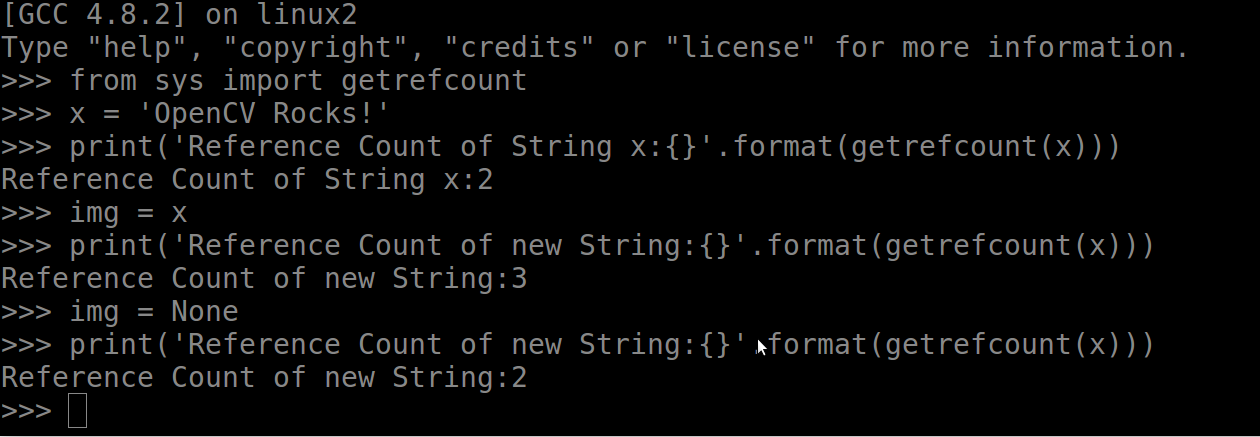

In [135]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_14.png')

As you can see the initial reference count starts at 2, then we do a new assignment and the reference count increases by one.  We do the new assignment to 'None' and the reference count is decreased by one. Another thing to keep in mind as we work with reference counts is that in Python everything has a reference count number. 
If we open a new version of OpenCV, specifically the 2.4.10 version, and open the following file then we can see the Py_DECREF and PY_INCREF being included in a program where they are used to increment and decrement the reference count:    
~/opencv-2.4.10/modules/python/src2/cv2.cv.hpp

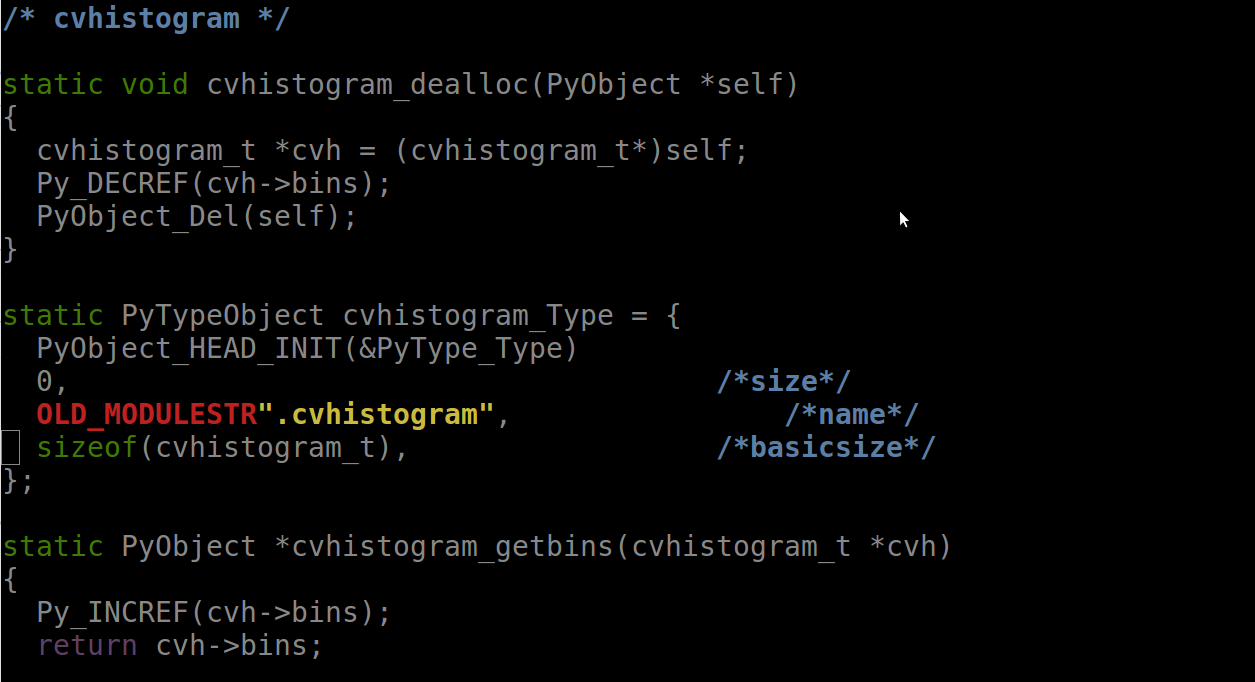

In [136]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_15.png')

and again in this file being used by Numpy:
	~/opencv-2.4.10/modules/python/src2/cv2.cpp

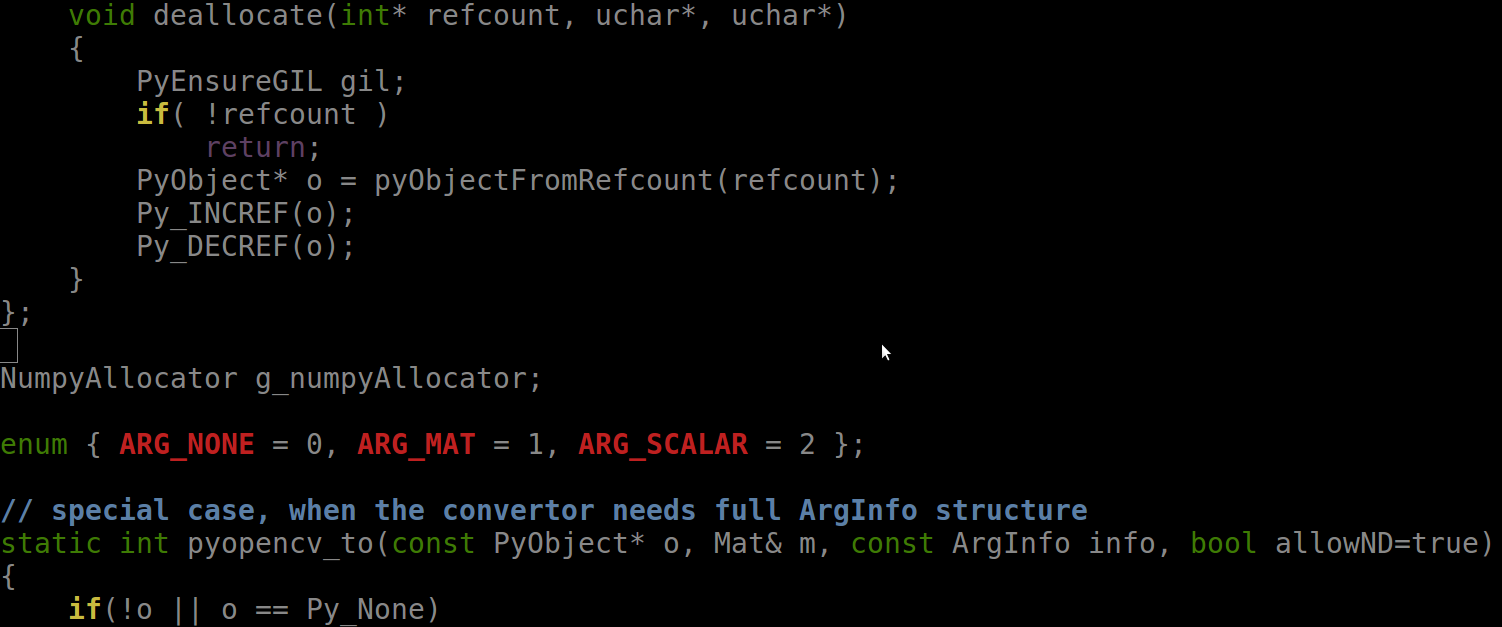

In [137]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_16.png')

To drive the idea home that everything in Python has a reference count number, let's open a Python interpreter and do the following:

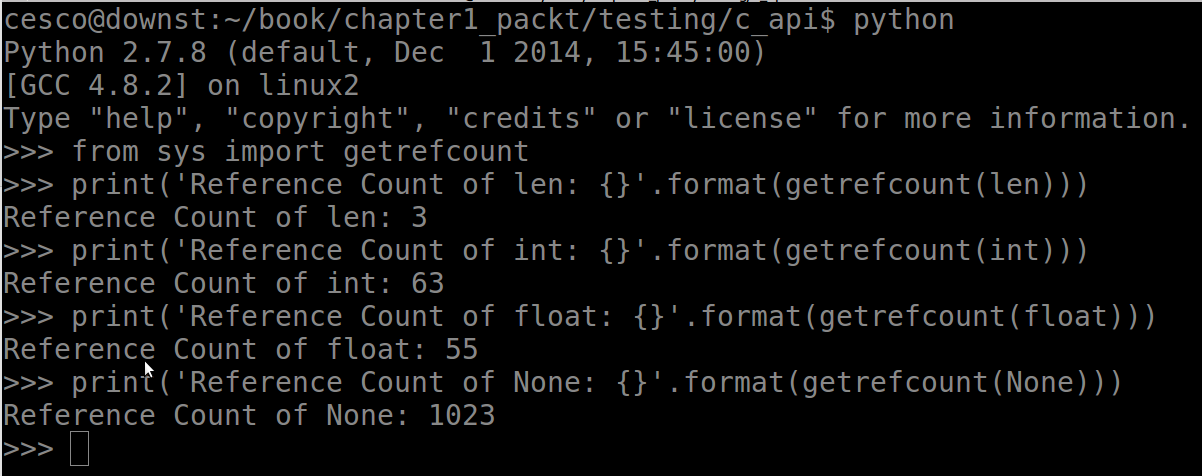

In [138]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_17.png')

As we can see it returns the reference counts of len, int, float, and None.

## How do the Python Bindings get Generated?

The tutorial page of OpenCV 3.0.0 has a nice explanation to this question, and you can go there to get a full definition.  I will try to explain to the best of my knowledge and capability.  
As we have already seen with Swig, and later with the Python C/API, it is very hard to work with these generators.  Swig works great with C, but give it some of the new C++ code of OpenCV, and it starts to throw compiler errors, memory leaks, flags compatibility errors, and so on.  To extend all OpenCV functions manually is not only a daunting task, and very tedious to perform, but it is also error-prone.  The solution to this task that OpenCV Python maintainers and developers came with, was to automate the functions generating process.  By using automatic methods instead of doing it manually it helps to reduce man-made errors.
By heading back to the main directory of our OpenCV version and opening the src2 directory we find this file:
	~/opencv-2.4.10/modules/python/CmakeLists.txt

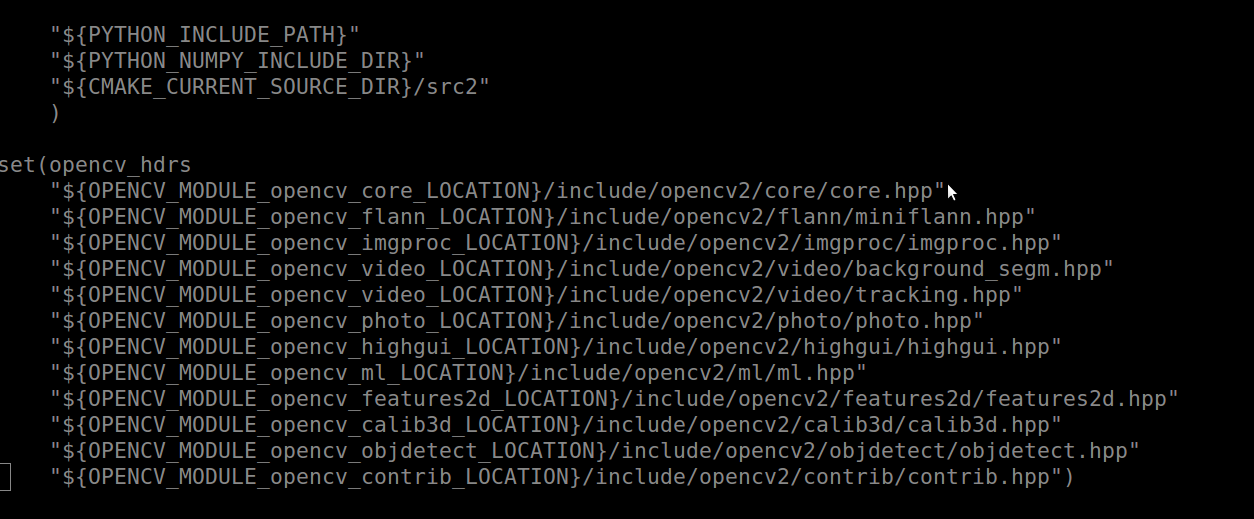

In [139]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_18.png')

This cmake script sets and grabs all the opencv_hdrs (all the header files ending with the .hpp designation) of the modules to be extended to Python.  These header files contain a list of all of the requirements for the modules to be extended, for example in this case the photo.hpp:

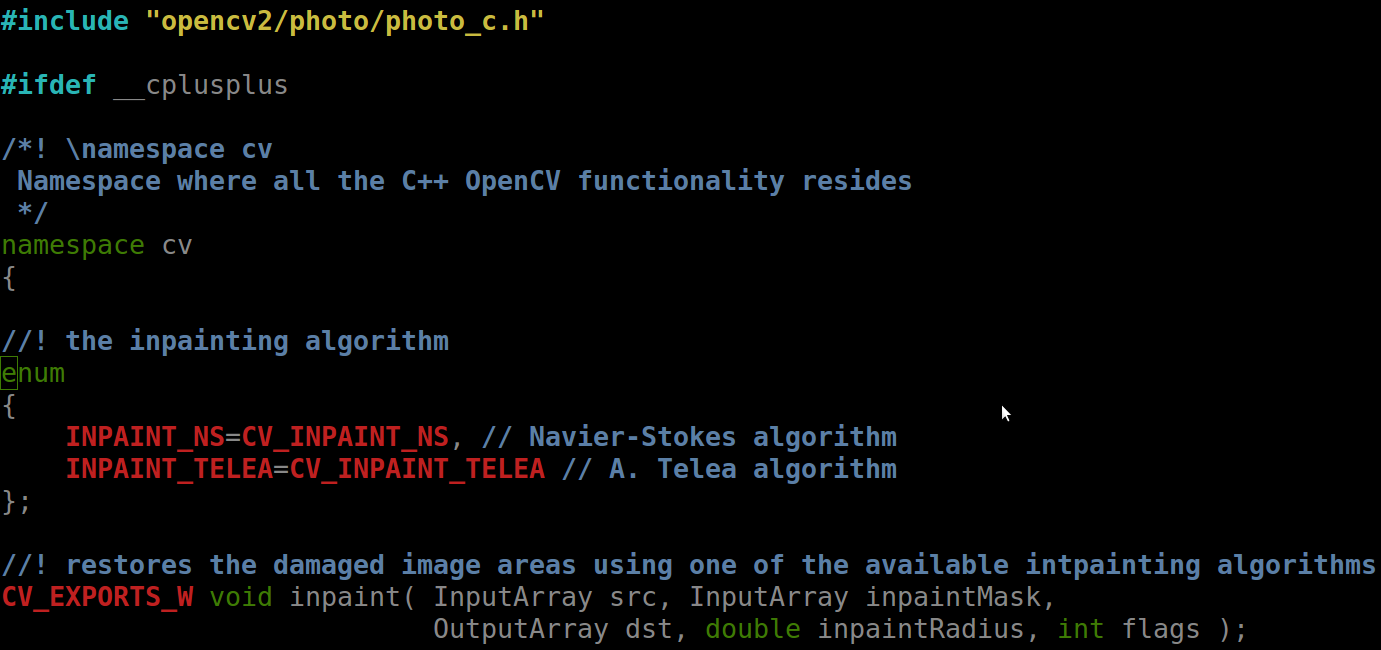

In [140]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_19.png')

In the next step of the generation of the bindings, there is a technique used that the core developers of OpenCV Python decided to take and break with the old OpenCV version.  Instead of continuing to use a standard wrapper generation tool like Swig, they decided to develop their own.  The tool that they developed is based on a parser, and a pair of generator python scripts. 

The parser splits, separates, and extracts the API into manageable python lists. These new parsed lists contain all of the requirements needed for the next step in the building process.  These include the manually added macros in accordance to the developer's particular programming needs and wishes:
	~/opencv-2.4.10/modules/python/src2/hdr_parser.py


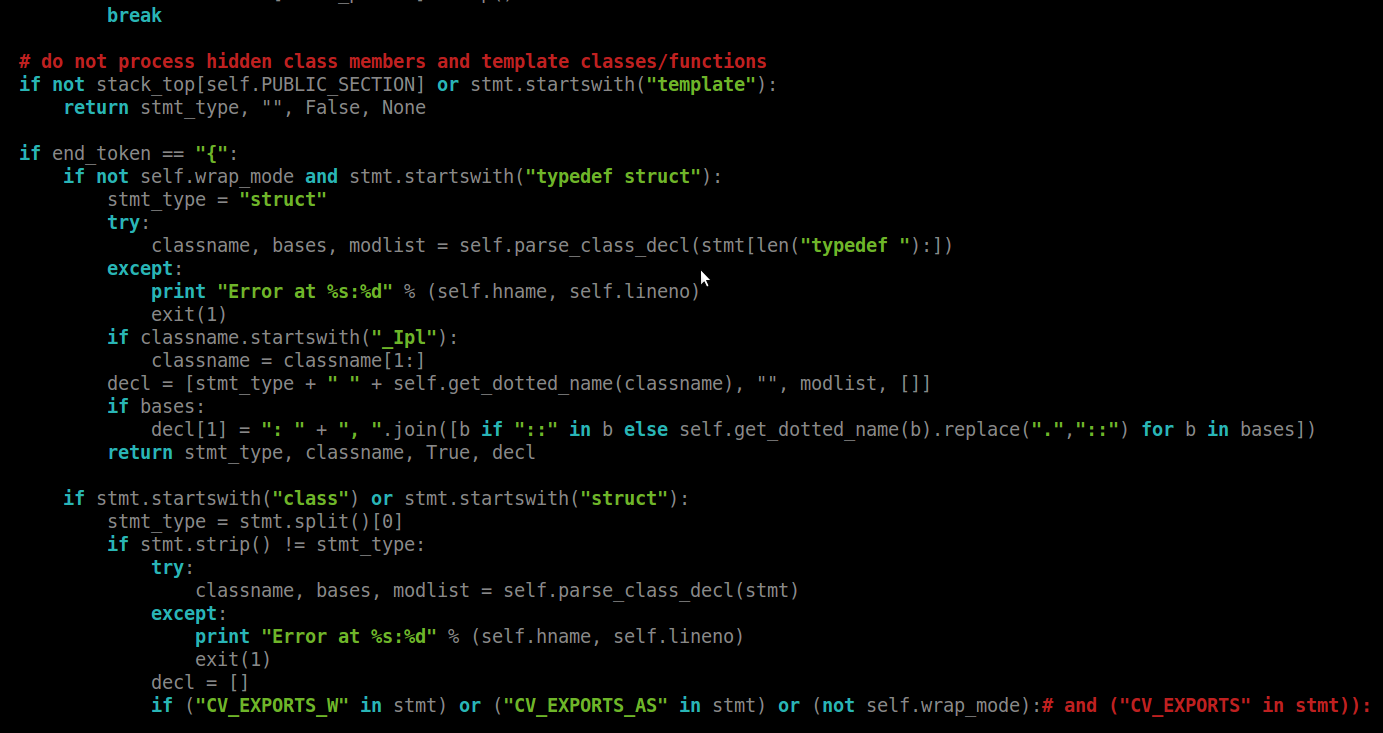

In [141]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_20.png')

It then uses two other python scripts, gen.py and gen2.py.  The use of these files will depend on the Python interface that they are dealing with as we explained on a preceding section.  If it is the old Python interface, then it will use the gen.py file.  

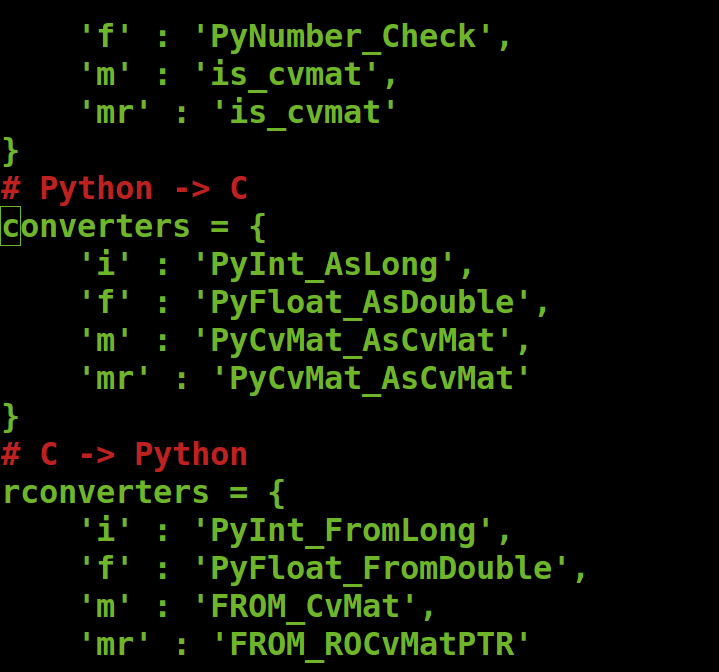

In [142]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_21.png')

If it is the new Python2 interface then it will use the gen2.py file.  There are certain differences on how they expose the old OpenCV matrix to Python, the incorporation of Numpy arrays, the C based code of the older interface, and the template-heavy new C++ based code.

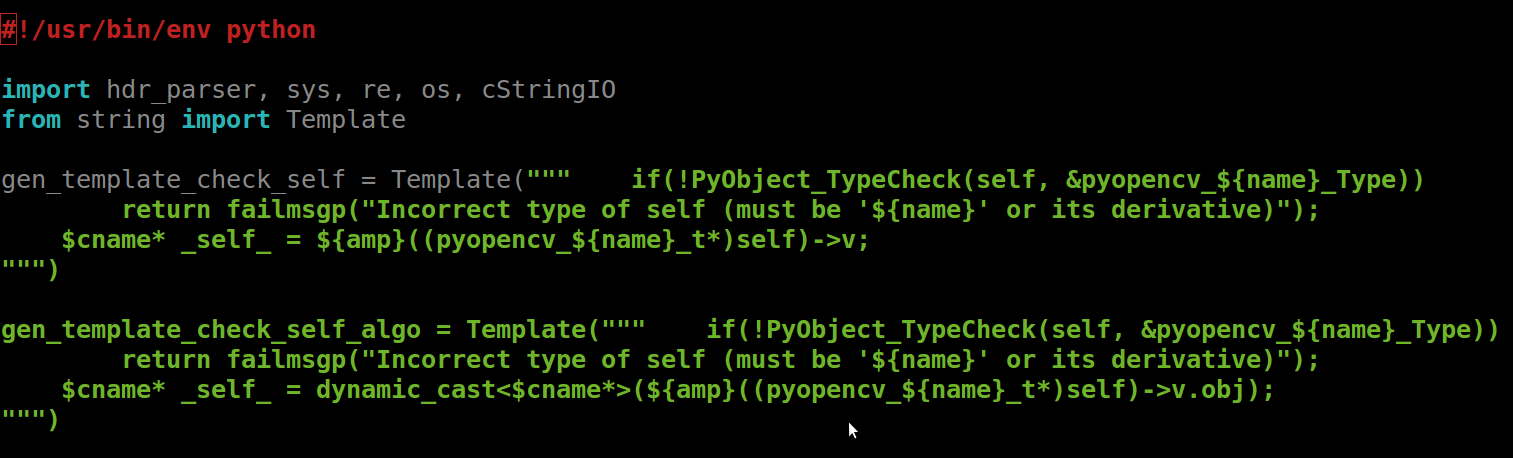

In [143]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_22.png')

The generator creates wrapper functions for all of the functions parsed by the hdr_parser.py script, omitting those datatypes that need to be extended manually.
For example when you apply one of the OpenCV functions to two images, these images are turned into NumPy arrays, not Standard Python lists.  These arrays, as previously explained need to be of the same type, and the elements need to be known in advance.  For this reason this calculation using Numpy arrays is optimized, and then they are  passed to a low-level cv::Mat written in C++ code, where it is compiled, and returned back as a Numpy array. As we can see most of the process is done with fast Numpy arrays, and an even faster cv::Mat C++ based code.  For this reason OpenCV computer vision running in tandem with Python is very fast, and efficient.

## An Android Application Project

In this last part of the chapter we will develop an intelligent video/camera surveillance application that takes advantage of the efficiency of low-level languages incorporated with the OpenCV Python-based bindings. 
The use of OpenCV in real-time detection, and intelligent video surveillance  has a lot to do with its dependence on low-level image processing functions, as well as its integration and use of high-level algorithms mostly written in C/C++. A lot of computer-vision situations must be executed in real-time, with a computational time window requirement between 35-45 milliseconds per single frame. OpenCV code tends to get executed at a faster rate, and at a lower taxing of your computational resources than your average conventionally used computer vision package.  For this reason, and because of its very open BSD license, OpenCV has become the de facto leader in real-time computer vision applications.  Recently introduced GPU modules will, with no doubt, continue to contribute to its growing use in computer vision and machine learning applications.  
In this example tutorial I will be using Optical Flow based in OpenCV.  This is based on the Lucas-Kanade tracking algorithm to track a moving video image.  This is a very simple example tutorial that will introduce the reader to the Android SDK, which we will be using in later applications.  It will also introduce the Android Debug Bridge command-line utility tool that can come very handy to control your Android devices.
Tracking points across a video image is a fundamental operation in many computer vision applications in order to find out how a camera/object moved, and also it can help us to resolve depth.  Being that I want to illustrate the camera and the object moving, I will be using an Android phone as the camera/camcorder device instead of a non-movable web cam. This will make it more interesting than just using a static old video, as well as to introduce new programming tools.
In order to operate the phone from my desktop, I will be using the Android Debug Bridge that comes with the SDK download from Google Android.  The ADB is a command-line utility that allows us to control our device over an USB connection from a desktop.  It also allows us to move files back and forth, install android application packages (apks), and run shell commands.   This will allow us to give the phone commands from our desktop command-line terminal, in order to develop dynamic video as it is happening. 

## Downloading the Java JDK and Android SDK

The first thing we need to do is to download the Java JDK and the Android SDK.  Before working with the Android SDK, we first have to have the Java JDK installed on our computer.  In order to download the JDK, we need to go to the java website

For Linux users that want Oracle Java, instead of the OpenJDK, 	they need to go to the following PPA installation instruction page:
http://www.webupd8.org/2012/01/install-oracle-java-jdk-7-in-ubuntu-via.html

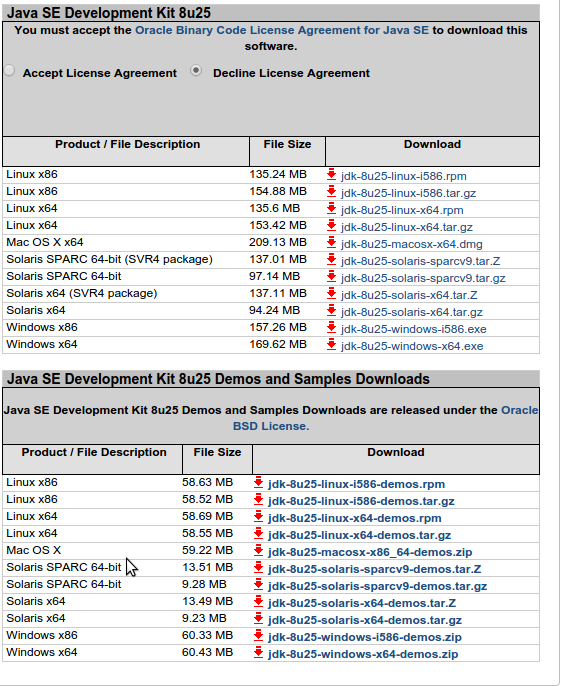

In [146]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_23.png')

   You need to accept the license and continue with the installation.  After the installation is completed, we need to set up the environment variables and add Java to our path

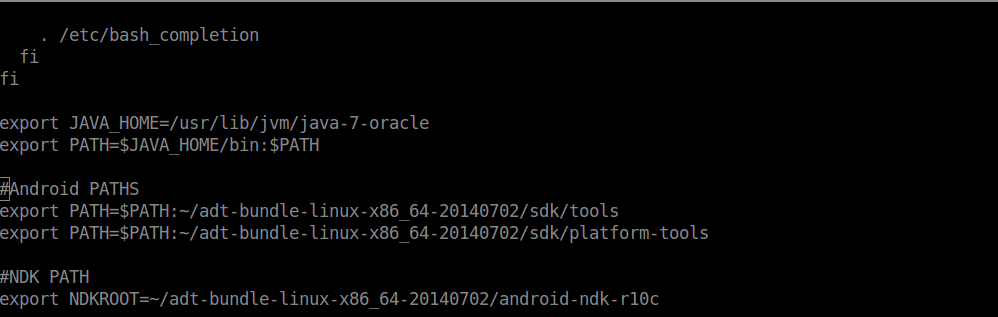

In [147]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_24.png')

Once Java has been added to your path, we can continue with the installation of the Android SDK.  In order to download the SDK, you need to go to the Google Android Developers Website
http://dl.google.com/android/android-sdk_r24.0.2-linux.tgz


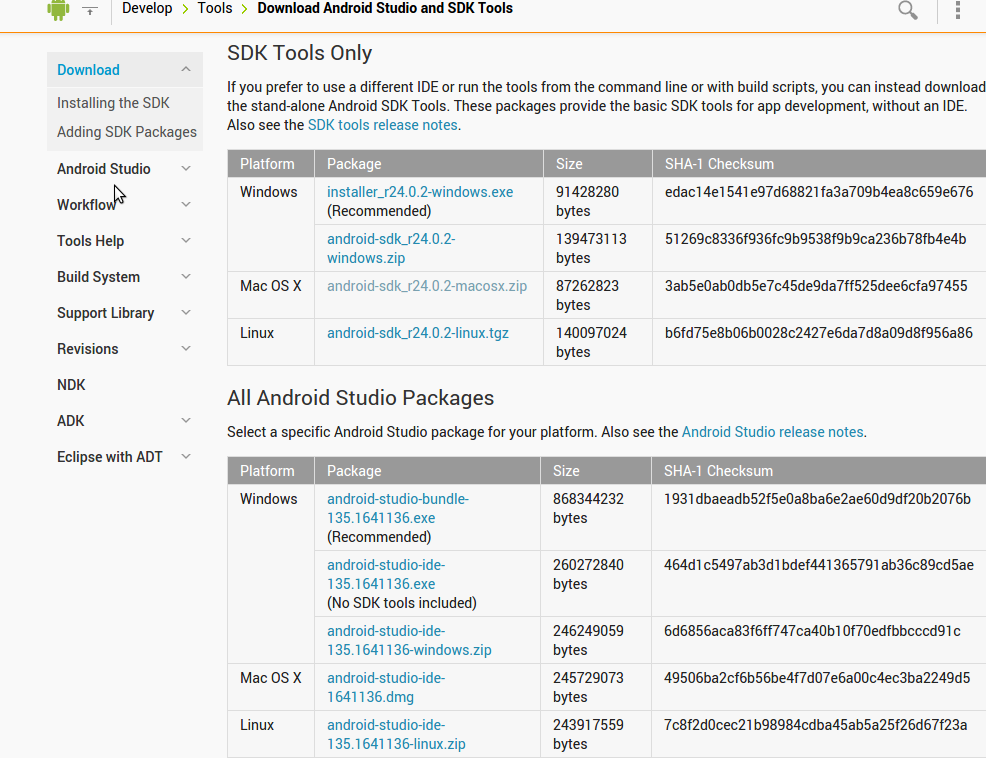

In [148]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_25.png')

We need to choose the appropriate tarball or zip according to our operating system, and then download it. Once the android SDK is downloaded and installed, add it to your path as we did with Java.  You can then open a terminal, change directory to you android download directory, find the tools directory, and find the SDK manager  android executable, and launch the SDK manager, by entering,  ./android     (or sudo ./android if permissions are needed)


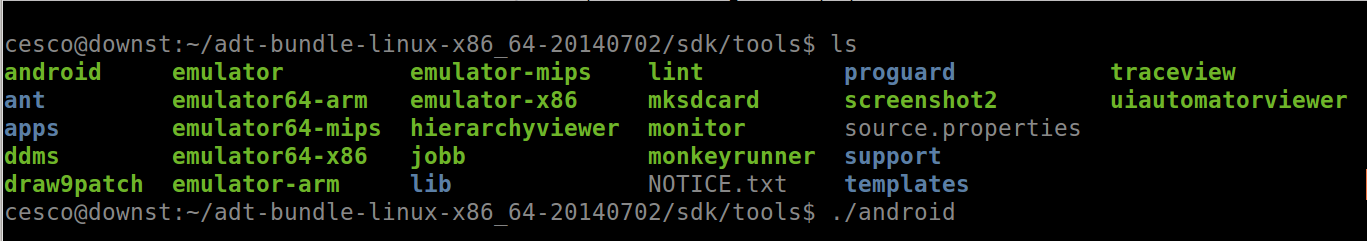

In [149]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_26.png')